In [103]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

## Claims Data

### All - Annual Cost

In [142]:
# Load Data
claims = pd.read_csv('data/claims.csv')

# Read costs from dataset
medical_costs = claims['Annual Medical Costs'].copy()
pharmacy_costs = claims['Annual Pharmacy Costs'].copy()

# Cleanup costs data
for i in range(len(medical_costs)):
    medical_costs[i] = float(medical_costs[i].replace('$', '').replace(',', ''))

for i in range(len(pharmacy_costs)):
    pharmacy_costs[i] = float(pharmacy_costs[i].replace('$', '').replace(',', ''))

claims['Total Costs'] = medical_costs + pharmacy_costs

# Parse and sum the costs
total_medical_cost = sum(medical_costs)
total_pharmacy_cost = sum(pharmacy_costs)
total_cost = total_medical_cost + total_pharmacy_cost


# Calculate the average cost
average_medical_cost = np.mean(medical_costs)
average_pharmacy_cost = np.mean(pharmacy_costs)
average_cost = np.mean(total_costs)

# Calculate standard deviation
medical_std_dev = np.std(medical_costs)
pharmacy_std_dev = np.std(pharmacy_costs)
total_std_dev = np.std(total_costs)


# Print results
print('Total cost: ${:.2f}'.format(total_cost))
print('Average cost: ${:.2f}'.format(average_cost))
print('Standard Deviation: ${:.2f}'.format(total_std_dev))

Total cost: $6490347.76
Average cost: $12980.70
Standard Deviation: $16438.06


### Frequency & cost of claims by treatment type

In [116]:
cust_with_1_or_more_claims = 0

metformin_only = 0
insulin_only = 0
both = 0

metformin_only_cost = 0
insulin_only_cost = 0
both_cost = 0

claims['Total Claims'] = [0] * len(claims)

# Read data for each individual
for i in range(len(claims)):
    # Read claim counts
    metformin_claims = claims.iloc[i]['Metformin Claims']
    insulin_claims = claims.iloc[i]['Insulin Claims']
    
    # Replace NaN values with 0
    if pd.isna(metformin_claims):
        metformin_claims = 0
    if pd.isna(insulin_claims):
        insulin_claims = 0
    
    # Check if customer has 1 or more claims
    if metformin_claims > 0 or insulin_claims > 0:
        cust_with_1_or_more_claims += 1
    
    # Check if customer has only metformin claims
    if metformin_claims > 0 and insulin_claims == 0:
        metformin_only += 1
        metformin_only_cost += pharmacy_costs[i]
    elif insulin_claims > 0 and metformin_claims == 0:
        insulin_only += 1
        insulin_only_cost += pharmacy_costs[i]
    elif insulin_claims > 0 and metformin_claims > 0:
        both += 1
        both_cost += pharmacy_costs[i]
    
    # Sum the claims
    claims.loc[i, "Total Claims"] = metformin_claims + insulin_claims
        
# Calculate percentages
cust_with_1_or_more_claims = cust_with_1_or_more_claims / len(claims) * 100
metformin_only = metformin_only / len(claims) * 100
insulin_only = insulin_only / len(claims) * 100
both = both / len(claims) * 100

# Calculate average costs
metformin_only_cost = metformin_only_cost / metformin_only
insulin_only_cost = insulin_only_cost / insulin_only
both_cost = both_cost / both

# Print results
print('Customers with 1 or more claims: {:.2f}%\n'.format(cust_with_1_or_more_claims))

print('Customers with only Metformin claims: {:.2f}%'.format(metformin_only))
print('Customers with only Insulin claims: {:.2f}%'.format(insulin_only))
print('Customers with both Metformin and Insulin claims: {:.2f}%\n'.format(both))

print('Average cost for customers with only Metformin claims: ${:.2f}'.format(metformin_only_cost))
print('Average cost for customers with only Insulin claims: ${:.2f}'.format(insulin_only_cost))
print('Average cost for customers with both Metformin and Insulin claims: ${:.2f}'.format(both_cost))

Customers with 1 or more claims: 67.20%

Customers with only Metformin claims: 48.20%
Customers with only Insulin claims: 11.40%
Customers with both Metformin and Insulin claims: 7.60%

Average cost for customers with only Metformin claims: $1061.99
Average cost for customers with only Insulin claims: $24534.10
Average cost for customers with both Metformin and Insulin claims: $20750.82


### Cost Histogram

Text(0, 0.5, 'Frequency')

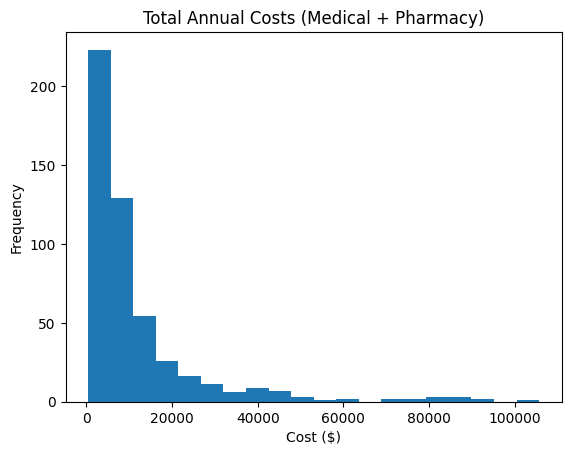

In [106]:
# Histogram of costs
plt.hist(medical_costs, bins=20)
plt.title('Total Annual Costs (Medical + Pharmacy)')
plt.xlabel('Cost ($)')
plt.ylabel('Frequency')

## Diagnosed Diabetes Trends

### Linear Regression (Annual Rate - All Groups)

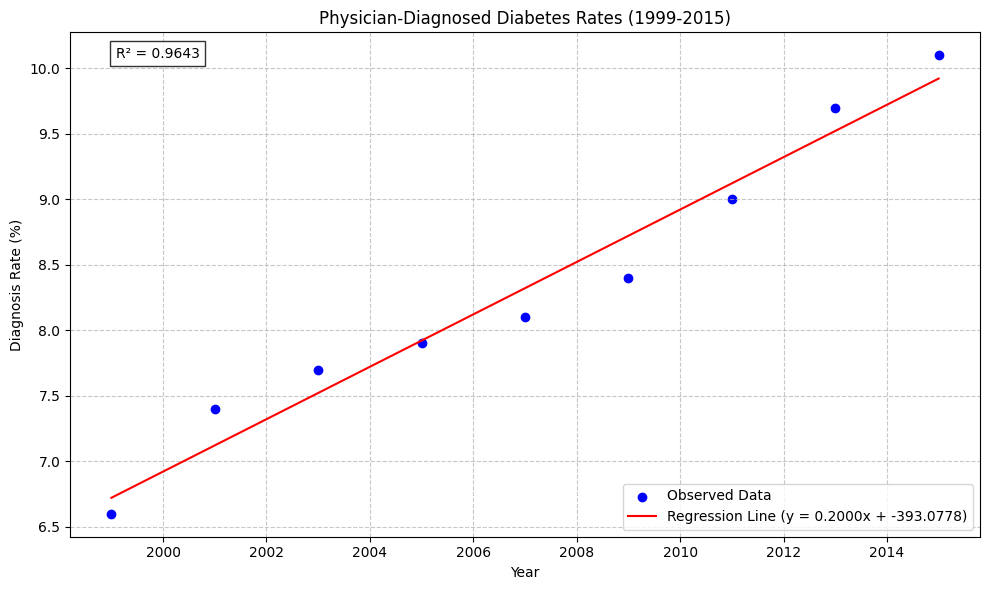

Regression Equation: y = 0.2000x + -393.0778
Correlation coefficient (r): 0.9820
R-squared: 0.9643
P-value: 0.0000

Trend Analysis:
Total change in diagnosis rate: 3.50%
Percent change over period: 53.03%
Average annual change: 0.4375%

Projected diagnosis rate for 2030: 12.92%


In [107]:
# Load data
diagnosed_data = pd.read_csv('data/diagnosed_diabetes.csv')

# Read data
all_persons = diagnosed_data[diagnosed_data['Sex, age, and race and Hispanic Origin'] == 'All persons']

# Get years and rates
years = pd.to_numeric(all_persons.columns[1:])
rates = pd.to_numeric(all_persons.iloc[0, 1:])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(years, rates)

# Calculate predicted values for the regression line
line = slope * years + intercept

# Create the plot
plt.figure(figsize=(10, 6))


# Plot scatter points
plt.scatter(years, rates, color='blue', label='Observed Data')

# Plot regression line
plt.plot(years, line, color='red', label=f'Regression Line (y = {slope:.4f}x + {intercept:.4f})')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Diagnosis Rate (%)')
plt.title('Physician-Diagnosed Diabetes Rates (1999-2015)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add R-squared value to plot
plt.text(0.05, 0.95, f'R² = {r_value**2:.4f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print statistical results
print(f"Regression Equation: y = {slope:.4f}x + {intercept:.4f}")
print(f"Correlation coefficient (r): {r_value:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

# Calculate percentage change
total_change = (rates.iloc[-1] - rates.iloc[0])
percent_change = (total_change / rates.iloc[0]) * 100
average_annual_change = total_change / (len(years) - 1)

print("\nTrend Analysis:")
print(f"Total change in diagnosis rate: {total_change:.2f}%")
print(f"Percent change over period: {percent_change:.2f}%")
print(f"Average annual change: {average_annual_change:.4f}%\n")

# Projection (2030)
projection_year = 2030
projection_value = slope * projection_year + intercept
print(f"Projected diagnosis rate for {projection_year}: {projection_value:.2f}%")


### Expected Value

In [135]:
rate_2024 = 13.1
insuracare_members = 500000

expected_value = (rate_2024 * insuracare_members) * average_cost

print(f"\nExpected cost for InsuraCare members in 2024: ${expected_value:,.2f}")


Expected cost for InsuraCare members in 2024: $85,023,555,656.00


### Risk Factors

Correlation between Age and Total Costs: -0.0680
Correlation between A1C Score and Total Costs: 0.0121
Correlation between Total Claims and Total Costs: 0.2122


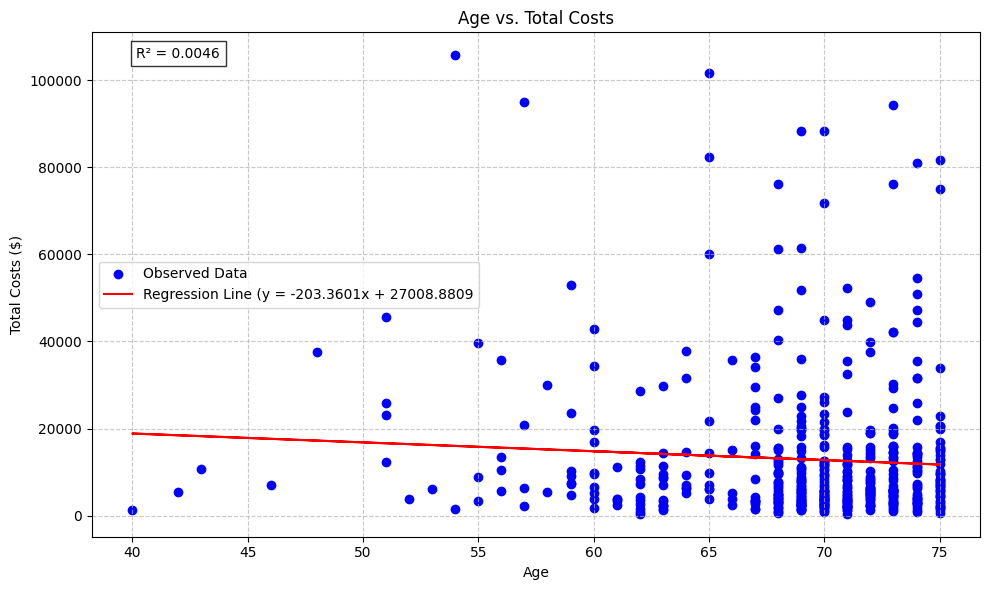

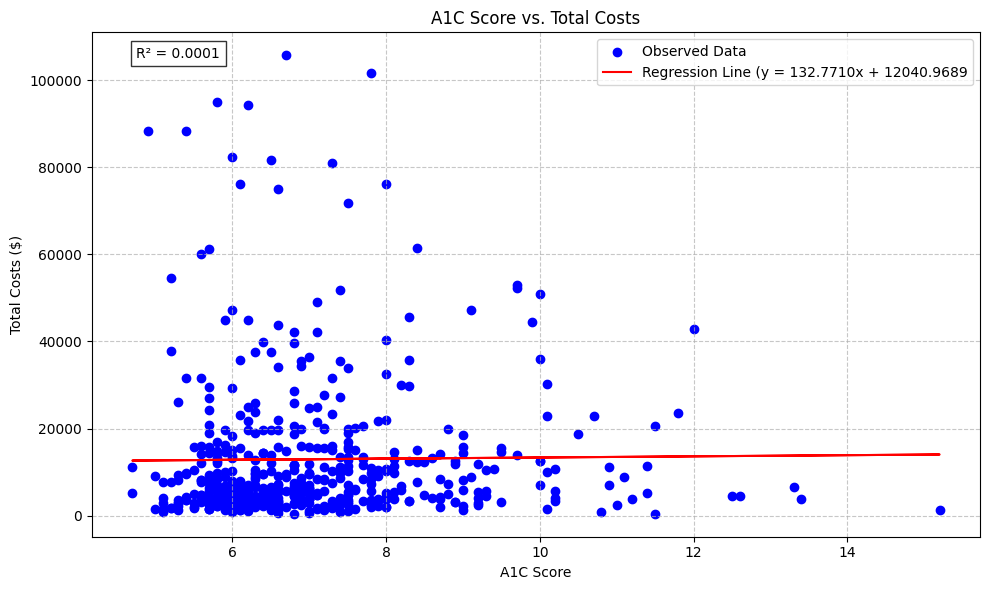

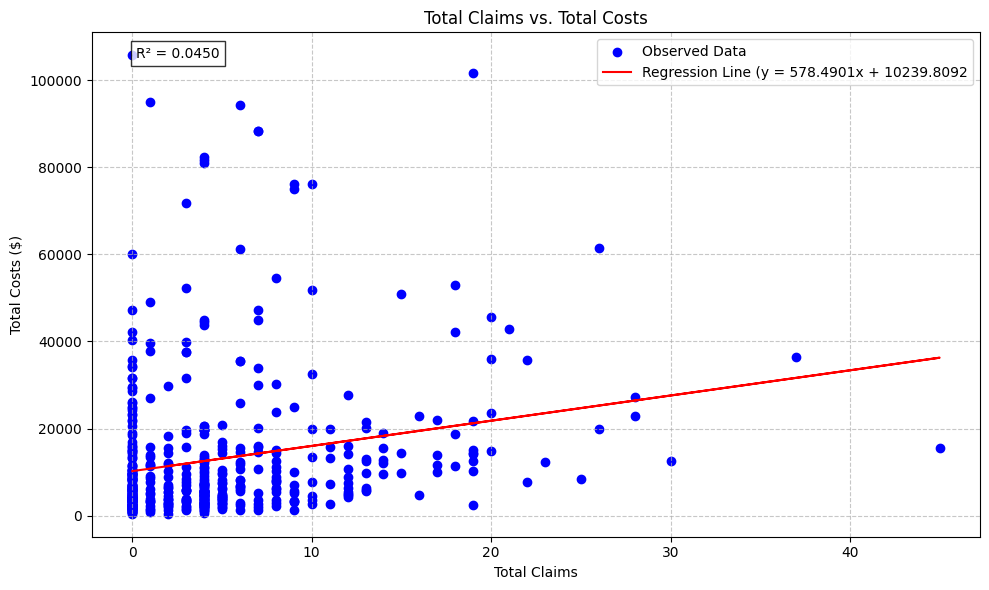

In [131]:
# Get risk factors (age, A1C, pharmacy claims)
age = claims['Age']
a1c = claims['A1C Score']
total_claims = claims['Total Claims']

# Add total costs to claims dataset
claims['Total Costs'] = total_costs.astype(float)

# Calculate total costs
total_costs = claims['Total Costs']

# Calculate correlations
age_corr = age.corr(total_costs)
a1c_corr = a1c.corr(total_costs)
claims_corr = total_claims.corr(total_costs)

# Print results
print(f"Correlation between Age and Total Costs: {age_corr:.4f}")
print(f"Correlation between A1C Score and Total Costs: {a1c_corr:.4f}")
print(f"Correlation between Total Claims and Total Costs: {claims_corr:.4f}")

# Plot data of age vs. total costs w/ line of best fit
plt.figure(figsize=(10, 6))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(age, total_costs)

# Calculate predicted values for the regression line
line = slope * age + intercept

# Plot scatter points
plt.scatter(age, total_costs, color='blue', label='Observed Data')

# Plot regression line
plt.plot(age, line, color='red', label=f'Regression Line (y = {slope:.4f}x + {intercept:.4f}')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Total Costs ($)')
plt.title('Age vs. Total Costs')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add R-squared value to plot
plt.text(0.05, 0.95, f'R² = {r_value**2:.4f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout and display
plt.tight_layout()
plt.show()

# Plot data of a1c vs. total costs w/ line of best fit
plt.figure(figsize=(10, 6))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(a1c, total_costs)

# Calculate predicted values for the regression line
line = slope * a1c + intercept

# Plot scatter points
plt.scatter(a1c, total_costs, color='blue', label='Observed Data')

# Plot regression line
plt.plot(a1c, line, color='red', label=f'Regression Line (y = {slope:.4f}x + {intercept:.4f}')

# Customize the plot
plt.xlabel('A1C Score')
plt.ylabel('Total Costs ($)')
plt.title('A1C Score vs. Total Costs')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add R-squared value to plot
plt.text(0.05, 0.95, f'R² = {r_value**2:.4f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout and display
plt.tight_layout()
plt.show()

# Plot data of total claims vs. total costs w/ line of best fit
plt.figure(figsize=(10, 6))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(total_claims, total_costs)

# Calculate predicted values for the regression line
line = slope * total_claims + intercept

# Plot scatter points
plt.scatter(total_claims, total_costs, color='blue', label='Observed Data')

# Plot regression line
plt.plot(total_claims, line, color='red', label=f'Regression Line (y = {slope:.4f}x + {intercept:.4f}')

# Customize the plot
plt.xlabel('Total Claims')
plt.ylabel('Total Costs ($)')
plt.title('Total Claims vs. Total Costs')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add R-squared value to plot
plt.text(0.05, 0.95, f'R² = {r_value**2:.4f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout and display
plt.tight_layout()
plt.show()

## DSMES Calculations

In [136]:
voucher_value = 20
participation = 0.1

# Calculate Payout
payout = voucher_value * (participation * (rate_2024/100) * insuracare_members) * 12

# Print results
print(f"Expected payout for InsuraCare in 2024: ${payout:,.2f}")

Expected payout for InsuraCare in 2024: $1,572,000.00


In [145]:
claim_reduction = 0.05

# Calculate new average cost
new_average_cost = average_cost * (1 - claim_reduction)

# Calculate new total cost
new_total_cost = new_average_cost * insuracare_members * rate_2024 / 100

# Print results
print(f"Total cost after 5% reduction: ${new_total_cost:,.2f}")

Total cost after 5% reduction: $807,723,778.73
